In [1]:
import pandas as pd
import utils
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer

In [2]:
##Cargar los datos
ruta_archivo = '../proyecto2/data/raw_merged_heart_dataset_dt2.csv'
df = utils.cargar_datos(ruta_archivo)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
##Exploracion incial
utils.exploracion_inicial(df)

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2181 non-null   int64  
 1   sex       2181 non-null   int64  
 2   cp        2181 non-null   int64  
 3   trestbps  2181 non-null   object 
 4   chol      2181 non-null   object 
 5   fbs       2181 non-null   object 
 6   restecg   2181 non-null   object 
 7   thalachh  2181 non-null   object 
 8   exang     2181 non-null   object 
 9   oldpeak   2181 non-null   float64
 10  slope     2181 non-null   object 
 11  ca        2181 non-null   object 
 12  thal      2181 non-null   object 
 13  target    2181 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 238.7+ KB
None
Estadisticas del dataset
               age          sex           cp      oldpeak       target
count  2181.000000  2181.000000  2181.000000  2181.000000  2181.000000
mean     

##### El dataset tiene 2181 filas con 13 columnas y no se valores nulos para esta consideracion. En cuanto a las estadisticas los valores numericos en su mayoria no presentan outliers a excepcion de oldpeak que si seria presentaria valores atipicos.

In [4]:
na_df = utils.identificar_valores_faltantes(df)
print(na_df)
utils.verificacion_elementos_duplicados(df)
# Ver duplicados por clase
print(df[df.duplicated()]['target'].value_counts())

Valores faltantes en el dataset
          datos sin NAs en q  Na en q  Na en %
age                     2181        0      0.0
sex                     2181        0      0.0
cp                      2181        0      0.0
trestbps                2181        0      0.0
chol                    2181        0      0.0
fbs                     2181        0      0.0
restecg                 2181        0      0.0
thalachh                2181        0      0.0
exang                   2181        0      0.0
oldpeak                 2181        0      0.0
slope                   2181        0      0.0
ca                      2181        0      0.0
thal                    2181        0      0.0
target                  2181        0      0.0
Cantidad de filas duplicadas:  1287
target
1    685
0    602
Name: count, dtype: int64


##### Se encuentran duplicados, sin embargo debido a que 1287 filas duplicadas representan el 59% del dataset no seran eliminados debido a que afectarian la clasificacion. 

In [5]:
##verificar inconsistencias en valores categoricos
utils.contar_valores_categoricos(df)
# Seleccionar columnas categóricas de tipo object
categorical_columns = df.select_dtypes(include=['object']).columns
### Una verificacion en el dataset se puede detectar que las columnas del tipo object cuentan con el simbolo ? el cual hay que modificar a Nan para luego modificar la columna a numerico

# Reemplazar valores '?' por NaN
df.replace('?', np.nan, inplace=True)

Valores únicos en la columna: trestbps
trestbps
120    300
130    278
140    249
110    139
150    129
160     89
138     81
125     78
128     72
112     60
132     51
118     47
135     43
108     40
124     38
145     37
100     32
134     31
152     30
170     29
122     27
180     25
136     21
115     20
126     19
142     19
105     19
146     13
94      13
178     13
102     12
148     11
144     10
200      8
155      7
106      7
123      7
117      7
165      7
154      6
192      6
174      6
101      6
156      6
129      6
104      6
172      6
114      5
164      4
98       1
190      1
?        1
113      1
92       1
158      1
Name: count, dtype: int64
--------------------------------------------------
Valores únicos en la columna: chol
chol
234    40
204    38
254    34
197    34
212    32
       ..
171     1
365     1
344     1
85      1
393     1
Name: count, Length: 202, dtype: int64
--------------------------------------------------
Valores únicos en la columna: 

In [6]:
# Debido a que son datos medicos los cuales son sensibles a cualquier numero lo tratamos mediante Imputación KNN
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

na_df = utils.identificar_valores_faltantes(df)
print(na_df)

Valores faltantes en el dataset
          datos sin NAs en q  Na en q  Na en %
age                     2181        0      0.0
sex                     2181        0      0.0
cp                      2181        0      0.0
trestbps                2181        0      0.0
chol                    2181        0      0.0
fbs                     2181        0      0.0
restecg                 2181        0      0.0
thalachh                2181        0      0.0
exang                   2181        0      0.0
oldpeak                 2181        0      0.0
slope                   2181        0      0.0
ca                      2181        0      0.0
thal                    2181        0      0.0
target                  2181        0      0.0


In [7]:
###Convertir columnas numericas
convert_dict = {
                'age': 'int64',
                'sex': 'int64',
                'cp': 'int64',
                'trestbps': 'int64',
                'chol': 'int64',
                'fbs': 'int64',
                'restecg': 'int64',
                'thalachh': 'int64',
                'exang': 'int64',
                'oldpeak': 'float64',
                'slope': 'int64',
                'ca': 'int64',
                'thal': 'int64',
                'target': 'int64'
                }

df = df.astype(convert_dict)

df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

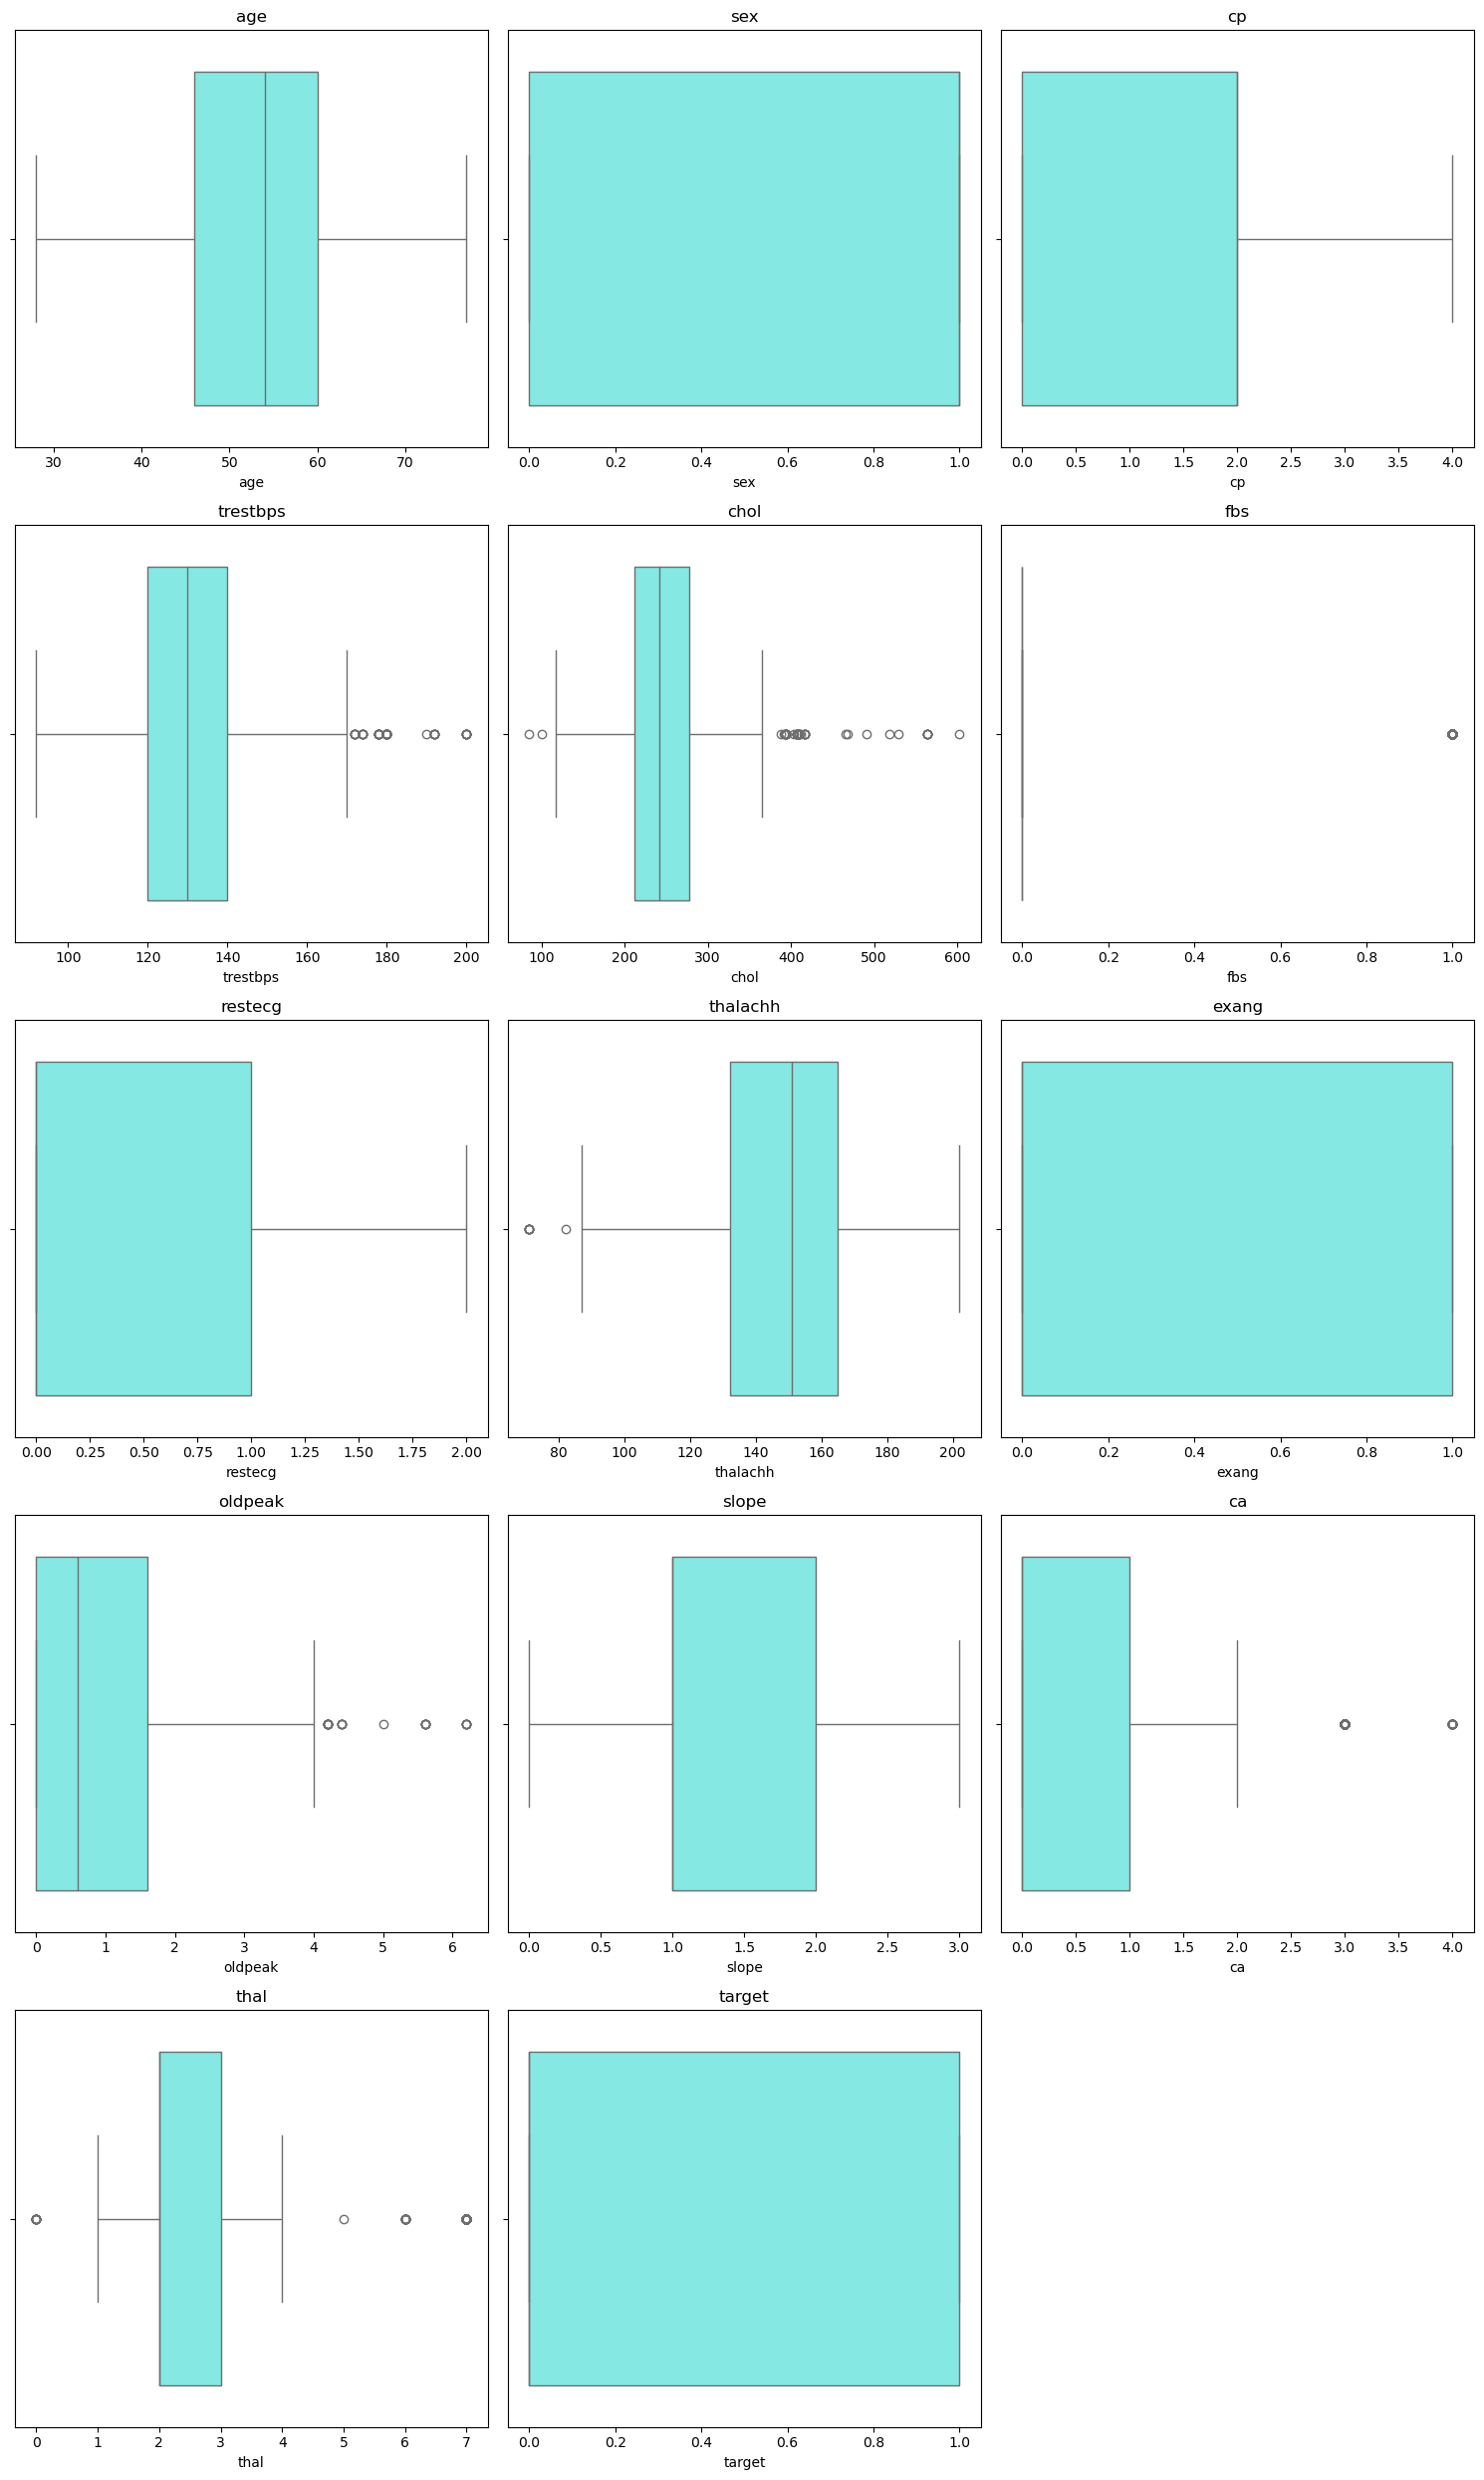

In [8]:
num_features = df.select_dtypes(include=['int64', 'float64'])
utils.plot_grafico_outliers(num_features,5,3,df)

##### En el grafico se obsevan que hay outliers presentes en algunas varibles los cuales deberan ser tratados con escalamiento para una mejor prediccion de los modelos predictivos.

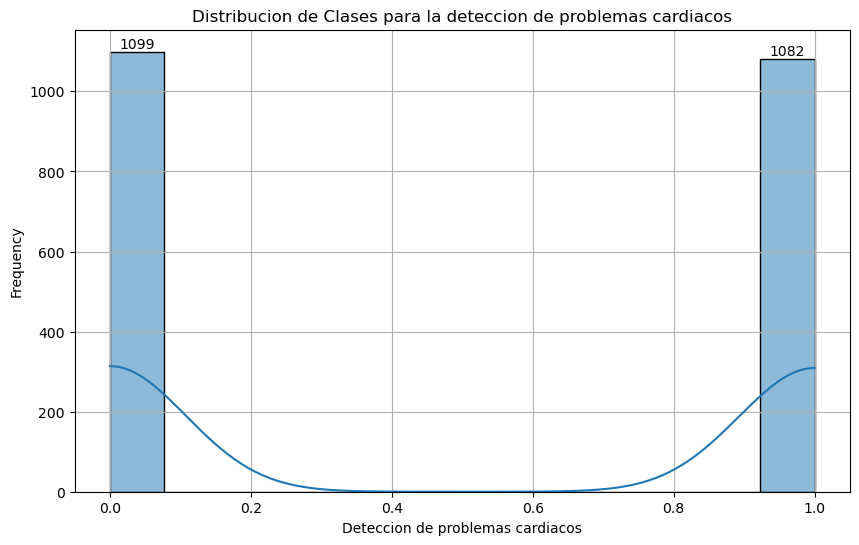

In [9]:
## Exploracion de datos
# Distribucion de la clase
plt.figure(figsize=(10, 6))
# Crear el histograma y almacenar la salida en una variable
hist = sns.histplot(df['target'], kde=True)
# Agregar los valores encima de las barras
for patch in hist.patches:  # Iterar sobre las barras
    x = patch.get_x() + patch.get_width() / 2  # Centro de la barra
    y = patch.get_height()  # Altura de la barra
    if y > 0:  # Mostrar solo si la frecuencia no es cero
        plt.text(x, y, int(y), ha='center', va='bottom', fontsize=10)
plt.title('Distribucion de Clases para la deteccion de problemas cardiacos')
plt.xlabel('Deteccion de problemas cardiacos')
plt.ylabel('Frequency')
plt.grid()
plt.show()

#### En este grafico se observa que el dataset se encuentra balanceado, con un aproximado de 50% cada uno de enfermedades cardicas 0 y 1. Por lo que funcionaria bien para la deteccion de tendencias por parte de los modelos.

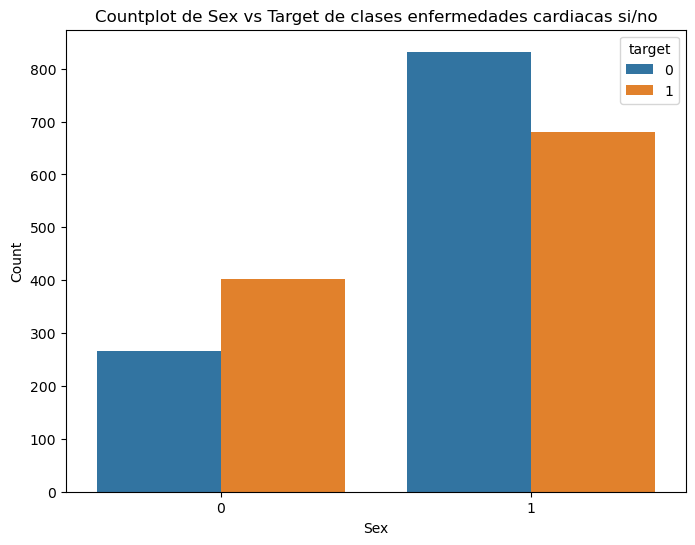

In [12]:
# Crear el countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='target')

# Personalizar el gráfico
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Countplot de Sex vs Target de clases enfermedades cardiacas si/no')
plt.show()

##### Se observa en el grafico que en su gran mayoria en el dataset hay un numero predominante de hombres (1) sobre las mujeres (0). Tambien podemos observar que para el caso de los hombres, hay un numero mayor de no deteccion de enfermedades cardiacas, sobre la deteccion de estas. Para el caso de las mujeres la cantidad de deteccion positiva de enfermedades cardiacas es mayor a la no deteccion, por lo que se considera una variable interesante de estudiar.

C:\Users\ENRIF\AppData\Local\Temp\ipykernel_7572\2173773827.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Enfermedad Cardiaca (0=No, 1=Sí)')


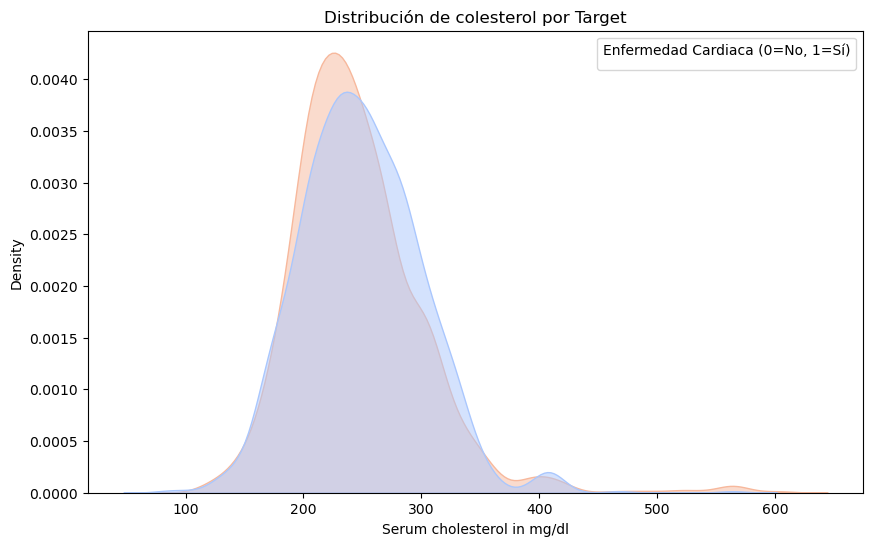

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='chol', hue='target', fill=True, alpha=0.5, palette='coolwarm')
plt.xlabel('Serum cholesterol in mg/dl')
plt.ylabel('Density')
plt.title('Distribución de colesterol por Target')
plt.legend(title='Enfermedad Cardiaca (0=No, 1=Sí)')
plt.show()


##### Este gráfico es un KDE plot (Kernel Density Estimate) que representa la distribución de los valores de colesterol (chol) en función de la variable target (enfermedad cardíaca: 0 = No - Naranaja, 1 = Sí Azul). Eje X valores de colesterol serico en mg/dl, eje Y densidad estimada, osea la frecuencia relativa de los valores. Existe una gran superposición entre las dos distribuciones, lo que sugiere que los niveles de colesterol por sí solos no son un buen predictor para distinguir entre pacientes con o sin enfermedad cardíaca.